In [1]:
import os
import glob

data_dir = os.path.join('data/Bengali','digit')

paths_train_a = glob.glob(os.path.join(data_dir, 'training-a', '*.png'))
paths_train_b = glob.glob(os.path.join(data_dir, 'training-b', '*.png'))
paths_train_e = glob.glob(os.path.join(data_dir, 'training-e', '*.png'))
paths_train_c = glob.glob(os.path.join(data_dir, 'training-c', '*.png'))
paths_train_d = glob.glob(os.path.join(data_dir, 'training-d', '*.png'))
paths_train_all = paths_train_a + paths_train_b + paths_train_c + paths_train_d + paths_train_e

paths_test_a = glob.glob(os.path.join(data_dir, 'testing-a', '*.png'))
paths_test_b = glob.glob(os.path.join(data_dir, 'testing-b', '*.png'))
paths_test_e = glob.glob(os.path.join(data_dir, 'testing-e', '*.png'))
paths_test_c = glob.glob(os.path.join(data_dir, 'testing-c', '*.png'))
paths_test_d = glob.glob(os.path.join(data_dir, 'testing-d', '*.png'))
paths_test_f = glob.glob(os.path.join(data_dir, 'testing-f', '*.png'))+glob.glob(os.path.join(data_dir,'testing-f','*.JPG'))
paths_test_auga = glob.glob(os.path.join(data_dir, 'testing-auga', '*.png'))
paths_test_augc = glob.glob(os.path.join(data_dir, 'testing-augc', '*.png'))
paths_test_all = paths_test_a + paths_test_b + paths_test_c + paths_test_d + paths_test_e + paths_test_f + paths_test_auga + paths_test_augc

path_label_train_a = os.path.join(data_dir, 'training-a.csv')
path_label_train_b = os.path.join(data_dir, 'training-b.csv')
path_label_train_e = os.path.join(data_dir, 'training-e.csv')
path_label_train_c = os.path.join(data_dir, 'training-c.csv')
path_label_train_d = os.path.join(data_dir, 'training-d.csv')

In [2]:
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical


def get_key(path):

    key = path.split(sep=os.sep)[-1]
    
    return key


def get_data(paths_img,path_label=None,resize_dim=None):

    X = []
    
    for i, path in enumerate(paths_img):

        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        if resize_dim is not None:
            
            img = cv2.resize(img, (resize_dim, resize_dim), interpolation = cv2.INTER_AREA)
        
        gaussian_3 = cv2.GaussianBlur(img, (9, 9), 10.0) 
        img = cv2.addWeighted(img, 1.5, gaussian_3, -0.5, 0, img)
        kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
        img = cv2.filter2D(img, -1, kernel)
        
        X.append(img) 
        
        if i == len(paths_img) - 1:
            
            end = '\n'
        
        else: 
            
            end = '\r'
        
        print('processed {}/{}'.format(i+1, len(paths_img)), end = end)
        
    X = np.array(X) 
    
    if  path_label is None:
        
        return X
    
    else:
    
        df = pd.read_csv(path_label) 
        df = df.set_index('filename') 

        y_label = [df.loc[get_key(path)]['digit'] for path in  paths_img] 
        y = to_categorical(y_label, 10)

        return X, y


In [3]:
RESIZE_DIM = 28

X_train_a, y_train_a = get_data(paths_train_a, path_label_train_a, resize_dim =RESIZE_DIM)
X_train_b, y_train_b = get_data(paths_train_b, path_label_train_b, resize_dim =RESIZE_DIM)
X_train_c, y_train_c = get_data(paths_train_c, path_label_train_c, resize_dim =RESIZE_DIM)
X_train_d, y_train_d = get_data(paths_train_d, path_label_train_d, resize_dim =RESIZE_DIM)
X_train_e, y_train_e = get_data(paths_train_e, path_label_train_e, resize_dim =RESIZE_DIM)

processed 19702/19702
processed 359/359
processed 24298/24298
processed 10908/10908
processed 16778/16778


In [4]:
X_train_all = np.concatenate((X_train_a, X_train_b, X_train_c, X_train_d, X_train_e), axis=0)
y_train_all = np.concatenate((y_train_a, y_train_b, y_train_c, y_train_d, y_train_e), axis=0)

X_train_all.shape, y_train_all.shape

((72045, 28, 28), (72045, 10))

In [5]:
numtaY_label = np.argmax(y_train_all, axis=1) 

# get the list of tuples
list_of_tuples = list(zip(numtaY_label)) 

# Converting lists of tuples into pandas Dataframe. 
data = pd.DataFrame(list_of_tuples, columns = ['label']) 
data = data.sort_values(by=['label'])


# Change label to alphabets
digit_mapper = {0: '০', 1: '১', 2: '২', 3: '৩', 4: '৪', 5: '৫', 6: '৬', 7: '৭', 8: '৮', 9: '৯'}

data['label'] = data['label'].map(digit_mapper)

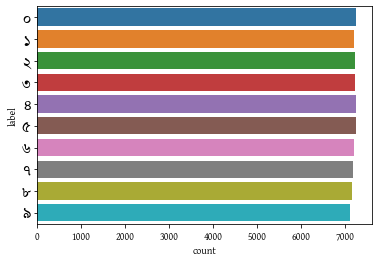

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname='models\data\Bengali\font',
    name='kalpurush')

fm.fontManager.ttflist.insert(0, fe) # or append is fine
plt.rcParams['font.family'] = fe.name # = 'your custom ttf font name'
plt.rcParams['ytick.labelsize'] = 15

graph = sns.countplot(y=data['label'])
plt.show()

In [7]:
X_test_a = get_data(paths_test_a, resize_dim = RESIZE_DIM)
X_test_b = get_data(paths_test_b, resize_dim = RESIZE_DIM)
X_test_c = get_data(paths_test_c, resize_dim = RESIZE_DIM)
X_test_d = get_data(paths_test_d, resize_dim = RESIZE_DIM)
X_test_e = get_data(paths_test_e, resize_dim = RESIZE_DIM)
X_test_f = get_data(paths_test_f, resize_dim = RESIZE_DIM)
X_test_auga = get_data(paths_test_auga, resize_dim = RESIZE_DIM)
X_test_augc = get_data(paths_test_augc, resize_dim = RESIZE_DIM)

processed 3489/3489
processed 69/69
processed 4381/4381
processed 1948/1948
processed 2970/2970
processed 495/495
processed 2168/2168
processed 2106/2106


In [8]:
X_test_all = np.concatenate((X_test_a, X_test_b, X_test_c, X_test_d, X_test_e, X_test_f, X_test_auga, X_test_augc))

In [9]:
X_train_all = X_train_all.reshape(X_train_all.shape[0], 28, 28, 1).astype('float32')
X_test_all = X_test_all.reshape(X_test_all.shape[0], 28, 28, 1).astype('float32')

In [10]:
X_train_all /= 255
X_test_all /= 255

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size = 0.2, random_state=42)

In [12]:
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, BatchNormalization

warnings.filterwarnings("ignore", category=DeprecationWarning) 

# my CNN architecture is In -> [[Conv2D->relu]*2 -> BatchNorm -> MaxPool2D -> Dropout]*3 -> Flatten -> Dense -> Activation -> Dropout -> Dense -> Activation -> Out

def my_model(img_size = 28,channels = 1):

    model = Sequential()
    input_shape = (img_size, img_size, channels)
    
    model.add(Conv2D(32, (5, 5), input_shape = input_shape, activation = 'relu', padding = 'same'))
    model.add(Conv2D(32, (5, 5), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
    model.add(Conv2D(256, (3, 3), activation ='relu' , padding = 'same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    return model


model = my_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint


path_model = 'output/B_D.h5'

K.clear_session() 

model = my_model() 

K.set_value(model.optimizer.lr, 1e-3)

# fit the model
history = model.fit(x = X_train, y = y_train, batch_size = 64, epochs=30, verbose=1, validation_data=(X_val,y_val), shuffle=True, callbacks=[ModelCheckpoint(filepath = path_model)])

Train on 57636 samples, validate on 14409 samples
Epoch 1/30
57636/57636 [==============================] - 250s 4ms/sample - loss: 0.6082 - acc: 0.7872 - val_loss: 0.1754 - val_acc: 0.9435
Epoch 2/30
57636/57636 [==============================] - 245s 4ms/sample - loss: 0.1455 - acc: 0.9573 - val_loss: 0.4433 - val_acc: 0.8816
Epoch 3/30
57636/57636 [==============================] - 245s 4ms/sample - loss: 0.1028 - acc: 0.9702 - val_loss: 0.2063 - val_acc: 0.9398
Epoch 4/30
57636/57636 [==============================] - 244s 4ms/sample - loss: 0.0832 - acc: 0.9755 - val_loss: 0.1251 - val_acc: 0.9655
Epoch 5/30
57636/57636 [==============================] - 245s 4ms/sample - loss: 0.0686 - acc: 0.9800 - val_loss: 0.1644 - val_acc: 0.9551
Epoch 6/30
57636/57636 [==============================] - 244s 4ms/sample - loss: 0.0577 - acc: 0.9835 - val_loss: 0.0847 - val_acc: 0.9774
Epoch 7/30
57636/57636 [==============================] - 245s 4ms/sample - loss: 0.0521 - acc: 0.9844 - val_l

In [14]:
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose = 0)

print('Test loss: %.4f%%' % scores[0])
print('Test accuracy: %.4f%%' % scores[1])

print("Large CNN Error: %.4f%%" % (100-scores[1]*100))

Test loss: 0.0948%
Test accuracy: 0.9862%
Large CNN Error: 1.3811%
